In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [195]:
ug= r'C:/Users/Kamanda/Desktop/DATABASE urllib JSON/EC Data/final-vote-by-district-2016---presidential.csv'
df = pd.read_csv(ug)

In [147]:
df.head()

,DISTRICT,REG.VOTERS,PDP,GF,PPP,FP,FDC,INDEP,INDEP.1,NRM,VALD VOTES,INVALID,TOTAL VOTES,LEADER
0,ABIM,30494,111,224,89,30,3693,44,74,17109,21374,1134,22508,NRM
1,ADJUMANI,64487,571,946,339,183,11197,148,128,26346,39858,4337,44195,NRM
2,AGAGO,85759,859,2217,663,330,19204,224,260,35501,59258,3016,62274,NRM
3,ALEBTONG,97699,1419,1328,859,370,28060,424,658,31592,64710,3426,68136,NRM
4,AMOLATAR,61127,391,465,414,129,18333,115,121,24789,44757,2020,46777,NRM


In [4]:
df.NRM.max()

176339

In [6]:
Ug = df[["FDC", "NRM"]].sum()
Ug.head(2)

FDC    3508687
NRM    5971872
dtype: int64

In [7]:
RegVoters=df['REG.VOTERS'].sum()
VALD_VOTES = df['VALD VOTES'].sum()
INVALID = df['INVALID'].sum()
print "Total votes cast valid and invalid"
print("{} + {} = {}".format(VALD_VOTES, INVALID, (VALD_VOTES + INVALID)))

#TotalVotes=VALD_VOTES+INVALID
#print TotalVotes
print "\n"
print "Total registered voter:",RegVoters

Total votes cast valid and invalid
9851812 + 477319 = 10329131


Total registered voter: 15277198


In [8]:
print 'Total voter turn out percentage'
#voter turn out 72.1548%
turnout =( float(VALD_VOTES + INVALID) / RegVoters )* 100; turnout
print turnout

Total voter turn out percentage
67.6114232466


In [10]:
#Rejected Ballots: 
rejected = df.INVALID.sum(); rejected
print "Invalid votes:",rejected

Invalid votes: 477319


In [11]:
rejected = df['INVALID'].sum(); rejected

477319L

In [12]:
#Local areas most in favor of staying vs leaving
dfa = df.groupby("DISTRICT").sum()
dfa.head(100)

,REG.VOTERS,PDP,GF,PPP,FP,FDC,INDEP,INDEP.1,NRM,VALD VOTES,INVALID,TOTAL VOTES
DISTRICT,,,,,,,,,,,,
001 APAC,152061,1282,1267,1307,373,38644,444,505,56371,100193,5023,105216
002 ARUA,336384,3737,5215,3341,1313,68108,1121,1346,114868,199049,20736,219785
003 BUNDIBUGYO,98976,300,457,158,123,8923,69,331,61553,71914,4054,75968
004 BUSHENYI,124934,270,490,268,182,26654,155,117,61837,89973,2797,92770
005 GULU,184791,1719,10487,1794,835,48594,478,596,31391,95894,5694,101588
006 HOIMA,228917,578,907,448,236,35249,363,315,111133,149229,8194,157423
007 IGANGA,222276,838,733,328,163,50506,460,2157,82281,137466,7444,144910
008 JINJA,233848,494,605,284,159,61692,196,1572,66063,131065,5861,136926
009 KABALE,271884,786,1635,888,259,65630,220,213,132047,201678,5465,207143


In [13]:
print "perc of votes per districs \n"
dfa["Perc_voter"] = dfa["TOTAL VOTES"] / (dfa["REG.VOTERS"]) * 100
print dfa["Perc_voter"]

perc of votes per districs 

DISTRICT
001 APAC            69.193284
002 ARUA            65.337531
003 BUNDIBUGYO      76.753961
004 BUSHENYI        74.255207
005 GULU            54.974539
006 HOIMA           68.768593
007 IGANGA          65.193723
008 JINJA           58.553419
009 KABALE          76.188007
010 KABAROLE        72.053045
011 KALANGALA       67.301288
012 KAMPALA         51.478072
013 KAMULI          64.722332
014 KAPCHORWA       79.919471
015 KASESE          73.015437
016 KIBAALE         71.220009
017 KIBOGA          69.095087
018 KISORO          75.047999
019 KITGUM          65.823282
020 KOTIDO          71.517966
021 KUMI            71.426196
022 LIRA            68.125824
023 LUWEERO         66.330133
024 MASAKA          67.804288
025 MASINDI         63.619195
026 MBALE           65.893918
027 MBARARA         67.698980
028 MOROTO          77.166527
029 MOYO            70.567304
030 MPIGI           71.119046
                      ...    
083 BUYENDE         68.660409
08

In [15]:
top5_leave = dfa[["Perc_voter","TOTAL VOTES","REG.VOTERS"]].sort_values(by="Perc_voter", ascending=False)[0:21]
top5_leave.head(5)

,Perc_voter,TOTAL VOTES,REG.VOTERS
DISTRICT,,,
063 KAABONG,87.261839,44151,50596
065 KIRUHURA,86.871377,134721,155081
109 BUHWEJU,81.935105,47397,57847
014 KAPCHORWA,79.919471,38705,48430
107 NAPAK,78.809770,34365,43605


In [33]:
#Stripping numbers in alphaNumericals 
s = df['DISTRICT']
result = ''.join([i for i in s if not i.isdigit()])
print  result

import re
output = re.sub(r'\d+', '', '123hello 456world')
#print output

my_str = '123hello 456world'
output = re.sub('[0-9]+', '', my_str)
#print output

001 APAC 002 ARUA 003 BUNDIBUGYO 004 BUSHENYI 005 GULU 006 HOIMA 007 IGANGA 008 JINJA 009 KABALE 010 KABAROLE 011 KALANGALA 012 KAMPALA 013 KAMULI 014 KAPCHORWA 015 KASESE 016 KIBAALE 017 KIBOGA 018 KISORO 019 KITGUM 020 KOTIDO 021 KUMI 022 LIRA023 LUWEERO024 MASAKA025 MASINDI026 MBALE027 MBARARA028 MOROTO029 MOYO030 MPIGI031 MUBENDE032 MUKONO033 NEBBI034 NTUNGAMO035 PALLISA036 RAKAI037 RUKUNGIRI038 SOROTI039 TORORO040 ADJUMANI041 BUGIRI042 BUSIA043 KATAKWI044 NAKASONGOLA045 SSEMBABULE046 KAMWENGE047 KAYUNGA048 KYENJOJO049 MAYUGE050 PADER051 SIRONKO052 WAKISO053 YUMBE054 KABERAMAIDO055 KANUNGU056 NAKAPIRIPIRIT057 AMOLATAR058 AMURIA059 BUKWO060 BUTALEJA061 IBANDA062 ISINGIRO063 KAABONG064 KALIRO065 KIRUHURA066 KOBOKO067 MANAFWA068 MITYANA069 NAKASEKE070 ABIM071 AMURU072 BUDAKA073 BULIISA074 DOKOLO075 NAMUTUMBA076 OYAM077 MARACHA078 BUDUDA079 BUKEDEA080 LYANTONDE081 AMUDAT082 BUIKWE083 BUYENDE084 KYEGEGWA085 LAMWO086 OTUKE087 ZOMBO088 ALEBTONG089 BULAMBULI090 BUVUMA091 GOMBA092 KIRYANDON

In [26]:
top5_leave1 = dfa[["Perc_voter","TOTAL VOTES","REG.VOTERS"]].sort_values(by="Perc_voter", ascending=True)[0:21]
top5_leave1.head(5)

,Perc_voter,TOTAL VOTES,REG.VOTERS
DISTRICT,,,
071 AMURU,49.884596,36526,73221
012 KAMPALA,51.478072,522139,1014294
110 NWOYA,53.779144,25188,46836
052 WAKISO,53.841128,484589,900035
005 GULU,54.974539,101588,184791


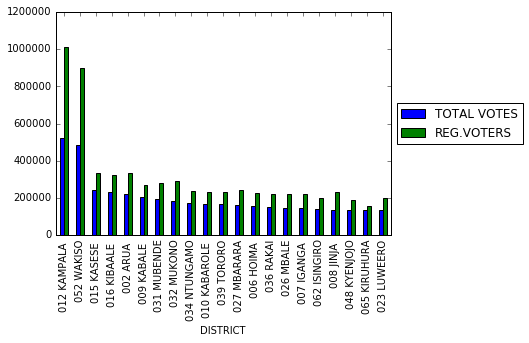

In [34]:
top5_leave2 = dfa[["TOTAL VOTES","REG.VOTERS",]].sort_values(by="TOTAL VOTES", ascending=False)[0:21]
top5_leave2.head(5)
plt1 = top5_leave2.plot(kind="bar")
plt1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [35]:
top5_leave = dfa[["Perc_voter","NRM","FDC"]].sort_values(by="Perc_voter", ascending=False)[0:21]
top5_leave.head(5)

,Perc_voter,NRM,FDC
DISTRICT,,,
063 KAABONG,87.261839,34703,1629
065 KIRUHURA,86.871377,121286,10786
109 BUHWEJU,81.935105,38229,5421
014 KAPCHORWA,79.919471,24761,11529
107 NAPAK,78.809770,29148,940


In [36]:
dfa['FDC_WIN'] =  dfa["FDC"] / (dfa["TOTAL VOTES"]) * 100
print dfa['FDC_WIN'].head()

DISTRICT
001 APAC           36.728254
002 ARUA           30.988466
003 BUNDIBUGYO     11.745735
004 BUSHENYI       28.731271
005 GULU           47.834390
Name: FDC_WIN, dtype: float64


In [37]:
top5_leave = dfa['FDC_WIN'].sort_values( ascending=False)[0:21]
top5_leave.head(15)

DISTRICT
012 KAMPALA      64.143648
052 WAKISO       57.944567
038 SOROTI       54.378338
015 KASESE       54.250572
022 LIRA         52.922795
039 TORORO       51.869853
024 MASAKA       49.129788
037 RUKUNGIRI    48.642330
026 MBALE        48.390385
005 GULU         47.834390
051 SIRONKO      47.546414
071 AMURU        47.295077
108 NGORA        46.741440
008 JINJA        45.054993
032 MUKONO       44.807727
Name: FDC_WIN, dtype: float64

In [103]:
top5_leaveF = dfa['FDC_WIN'].sort_values( ascending=True)[0:21]
top5_leaveF.head(15)

DISTRICT
081 AMUDAT            1.994106
107 NAPAK             2.735341
020 KOTIDO            3.179424
056 NAKAPIRIPIRIT     3.334555
063 KAABONG           3.689611
028 MOROTO            5.106554
065 KIRUHURA          8.006176
018 KISORO            9.897767
109 BUHWEJU          11.437433
003 BUNDIBUGYO       11.745735
084 KYEGEGWA         11.869845
046 KAMWENGE         12.261990
048 KYENJOJO         12.421675
083 BUYENDE          13.099793
044 NAKASONGOLA      13.192519
Name: FDC_WIN, dtype: float64

In [38]:
dfa['NRM_WIN'] =  dfa["NRM"] / (dfa["TOTAL VOTES"]) * 100
print dfa['NRM_WIN'].head()

DISTRICT
001 APAC           53.576452
002 ARUA           52.263803
003 BUNDIBUGYO     81.024905
004 BUSHENYI       66.656247
005 GULU           30.900303
Name: NRM_WIN, dtype: float64


In [39]:
top5_leave = dfa['NRM_WIN'].sort_values( ascending=False)[0:21]
top5_leave.head(15)

DISTRICT
081 AMUDAT           96.689249
065 KIRUHURA         90.027538
056 NAKAPIRIPIRIT    89.959692
018 KISORO           86.139343
107 NAPAK            84.818856
046 KAMWENGE         83.960608
084 KYEGEGWA         83.259439
048 KYENJOJO         82.715559
020 KOTIDO           82.684538
028 MOROTO           81.383193
003 BUNDIBUGYO       81.024905
044 NAKASONGOLA      80.809918
109 BUHWEJU          80.657004
061 IBANDA           79.383790
063 KAABONG          78.600711
Name: NRM_WIN, dtype: float64

In [40]:
print 'Voter turn out and NRM win'
top5_leave = dfa[["Perc_voter","FDC_WIN","NRM_WIN","FDC","NRM","TOTAL VOTES"]].sort_values(by="Perc_voter", ascending=False)[0:21]
top5_leave.head(15)

Voter turn out and NRM win


,Perc_voter,FDC_WIN,NRM_WIN,FDC,NRM,TOTAL VOTES
DISTRICT,,,,,,
063 KAABONG,87.261839,3.689611,78.600711,1629,34703,44151
065 KIRUHURA,86.871377,8.006176,90.027538,10786,121286,134721
109 BUHWEJU,81.935105,11.437433,80.657004,5421,38229,47397
014 KAPCHORWA,79.919471,29.786849,63.973647,11529,24761,38705
107 NAPAK,78.809770,2.735341,84.818856,940,29148,34365
059 BUKWO,78.616998,16.130967,78.216844,4572,22169,28343
043 KATAKWI,77.691468,29.356493,59.701874,16090,32722,54809
104 KWEEN,77.656519,25.160792,67.259455,7824,20915,31096
058 AMURIA,77.613309,36.211197,52.958026,30341,44373,83789


In [260]:
census_datas={
    "education": r'C:/Users/Kamanda/Desktop/DATABASE urllib JSON/UgaCensus/2014-uganda-education-characteristics-of-the-population-by-district.xls',
    "energy": r'C:/Users/Kamanda/Desktop/DATABASE urllib JSON/UgaCensus/household-distribution-by-source-of-enery-for-cooking.xls',

}

In [267]:
education = pd.read_excel(io=census_datas["education"], sheetname="2014-uganda-education-character", header=1, parse_cols=("A,B,C,H,J,K"))
education.dropna(how='all', inplace=True)
education.rename(index=str, inplace=True, columns={"Secondary and above": "Secondary_and_above","Sub-county":"Sub_county","Not Literate":"Not_Literate" }) 
education = education[["DISTRICT","Sub_county", "Secondary_and_above","Literate","Not_Literate","Region"]]
education.head(10)

,DISTRICT,Sub_county,Secondary_and_above,Literate,Not_Literate,Region
0,BUHWEJU,Bihanga,1333,3991.0,1866.0,Western
1,BUHWEJU,Bitsya,1630,5033.0,1908.0,Western
2,BUHWEJU,Burere,2049,5693.0,2523.0,Western
3,BUHWEJU,Engaju,1293,5029.0,2824.0,Western
4,BUHWEJU,Karungu,1754,5032.0,1887.0,Western
5,BUHWEJU,Nsiika T.Council,480,1138.0,228.0,Western
6,BUHWEJU,Nyakishana,1652,5586.0,2106.0,Western
7,BUHWEJU,Rwengwe,2353,5498.0,2283.0,Western
8,BUHWEJU,Buhweju Total,12544,37000.0,15625.0,Western
9,BULIISA,Sub-county,1825,3855.0,3026.0,Western


In [262]:
energy = pd.read_excel(io=census_datas["energy"], sheetname="household-distribution-by-sourc", header=0, parse_cols=("C:I"))
energy.dropna(how='all', inplace=True)
#age.rename(index=str, inplace=True, columns={"Secondary and above": "Secondary_and_above","Sub-county":"Sub_county","Not Literate":"Not_Literate" }) 
energy = energy[["DISTRICT","electricity ","gas ","paraffin_stove ","charcoal "]]
#energy = energy[["DISTRICT","electricity "]]
energy.head(10)

,DISTRICT,electricity,gas,paraffin_stove,charcoal
0,BUIKWE,2481,444,881,36107
1,BUKOMANSIMBI,521,73,334,3118
2,BUTAMBALA,431,53,308,4444
3,BUVUMA,133,51,184,10267
4,GOMBA,619,101,269,4142
5,KALANGALA,182,45,509,11655
6,KALUNGU,742,129,635,6868
7,KAMPALA,33792,22802,17947,321686
8,KAYUNGA,891,172,509,14594
9,KIBOGA,408,86,303,8086


In [263]:
agew = age.groupby("District").sum()
agew.head()

,Secondary_and_above,Literate,Not_Literate
District,,,
Abim,34164,51920.0,34580.0
Adjumani,61634,107774.0,71818.0
Agago,53478,103322.0,79342.0
Alebtong,48530,123410.0,68952.0
Amolatar,37240,92678.0,33664.0


In [222]:
votes_org = pd.read_csv(ug, usecols=["DISTRICT","NRM","FDC"] )
votes = votes_org[["DISTRICT","NRM","FDC"]]
print votes.head()

       DISTRICT     NRM    FDC
0         APAC    56371  38644
1         ARUA   114868  68108
2   BUNDIBUGYO    61553   8923
3     BUSHENYI    61837  26654
4         GULU    31391  48594


In [342]:

#merged = votes.merge(education, on='DISTRICT').merge(energy, on='DISTRICT')
merged = votes.merge(energy, on='DISTRICT')
#print merged
#print votes.head(4)
#print energy.head(4)
#merged.to_csv("output.csv", index=False)
#allg=votes.merge(energy,on='DISTRICT', how ='left').merge(education,on='DISTRICT', how ='left')
allg=votes.combine_first(energy)
print allg.head()
#print allg.fillna('unk',inplace=True)
#print allg["gas "]; allg["FDC"]

       DISTRICT    FDC     NRM  charcoal   electricity    gas   \
0         APAC   38644   56371    36107.0        2481.0  444.0   
1         ARUA   68108  114868     3118.0         521.0   73.0   
2   BUNDIBUGYO    8923   61553     4444.0         431.0   53.0   
3     BUSHENYI   26654   61837    10267.0         133.0   51.0   
4         GULU   48594   31391     4142.0         619.0  101.0   

   paraffin_stove   
0            881.0  
1            334.0  
2            308.0  
3            184.0  
4            269.0  


In [242]:
print energy.head(4)

        DISTRICT  electricity   gas   paraffin_stove   charcoal 
0        BUIKWE           2481   444              881      36107
1  BUKOMANSIMBI            521    73              334       3118
2     BUTAMBALA            431    53              308       4444
3        BUVUMA            133    51              184      10267


In [254]:
#Use scatter plots to show the relations. Defining a function to avoid too much repetition of code:
def showplot(allg, factor):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(1,1,1) 
    ax.scatter(allg["FDC"], allg[factor], s=60, c='r', marker="o", label=factor)
    plt.legend(loc='upper left');
    plt.xlabel("votes (< 0 = leave / > 0 = remain)")
    plt.ylabel(factor)
    plt.axvline(x=0)
    plt.axhline(y=allg[factor].mean()) # draw a horizontal line in the mean of the dataset
    plt.show()
    #fig.savefig(factor+".png")

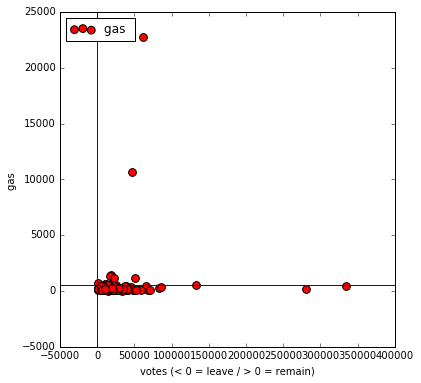

In [255]:
showplot(allg, "gas ")

In [256]:
allg.describe()

,FDC,NRM,charcoal,electricity,gas,paraffin_stove
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,31327.562500,53320.285714,14984.455357,1348.767857,554.437500,722.187500
std,43116.573584,35104.836402,44252.823278,3789.275668,2353.251202,2106.902964
min,521.000000,9922.000000,585.000000,71.000000,40.000000,50.000000
25%,11263.750000,29765.250000,2689.500000,304.250000,100.500000,179.500000
50%,21080.000000,44057.500000,4927.500000,573.500000,177.000000,318.500000
75%,37492.500000,65047.250000,11876.500000,1135.750000,338.500000,588.250000
max,334919.000000,176339.000000,342921.000000,33792.000000,22802.000000,17947.000000


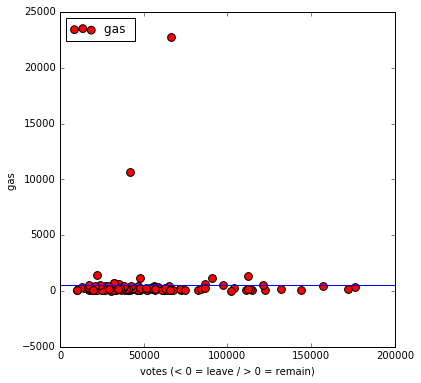

In [250]:
showplot(allg, "gas ")

In [293]:
votes_region = education.groupby("DISTRICT").sum()
votes_region.head(12)

,Secondary_and_above,Literate,Not_Literate
DISTRICT,,,
ABIM,34164,51920.0,34580.0
ADJUMANI,61634,107774.0,71818.0
AGAGO,53478,103322.0,79342.0
ALEBTONG,48530,123410.0,68952.0
AMOLATAR,37240,92678.0,33664.0
AMUDAT,8562,12924.0,57680.0
AMURIA,66928,135256.0,81362.0
AMURU,37826,86246.0,63400.0
APAC,90262,231254.0,86970.0


In [294]:
votes_region.index

Index([u'ABIM', u'ADJUMANI', u'AGAGO', u'ALEBTONG', u'AMOLATAR', u'AMUDAT',
       u'AMURIA', u'AMURU', u'APAC', u'ARUA',
       ...
       u'RUKUNGIRI', u'SERERE', u'SHEEMA', u'SIRONKO', u'SOROTI',
       u'SSEMBABULE', u'TORORO', u'WAKISO', u'YUMBE', u'ZOMBO'],
      dtype='object', name=u'DISTRICT', length=111)

In [295]:
education.index = education.index.str.strip()

In [296]:
[i for i in votes_region.index if i not in education.index]

[u'ABIM',
 u'ADJUMANI',
 u'AGAGO',
 u'ALEBTONG',
 u'AMOLATAR',
 u'AMUDAT',
 u'AMURIA',
 u'AMURU',
 u'APAC',
 u'ARUA',
 u'BUDAKA',
 u'BUDUDA',
 u'BUGIRI',
 u'BUHWEJU',
 u'BUIKWE',
 u'BUKEDEA',
 u'BUKOMANSIMBI',
 u'BUKWO',
 u'BULAMBULI',
 u'BULIISA',
 u'BUNDIBUGYO',
 u'BUSHENYI',
 u'BUSIA',
 u'BUTALEJA',
 u'BUTAMBALA',
 u'BUVUMA',
 u'BUYENDE',
 u'DOKOLO',
 u'GOMBA',
 u'GULU',
 u'HOIMA',
 u'IBANDA',
 u'IGANGA',
 u'ISINGIRO',
 u'JINJA',
 u'KAABONG',
 u'KABALE',
 u'KABAROLE',
 u'KABERAMAIDO',
 u'KALANGALA',
 u'KALIRO',
 u'KALUNGU',
 u'KAMPALA',
 u'KAMULI',
 u'KAMWENGE',
 u'KANUNGU',
 u'KAPCHWORWA',
 u'KASESE',
 u'KATAKWI',
 u'KAYUNGA',
 u'KIBAALE',
 u'KIBOGA',
 u'KIBUKU',
 u'KIRUHURA',
 u'KIRYANDONGO',
 u'KISORO',
 u'KITGUM',
 u'KOBOKO',
 u'KOLE',
 u'KOTIDO',
 u'KUMI',
 u'KWEEN',
 u'KYANKWANZI',
 u'KYEGEGWA',
 u'KYENJOJO',
 u'LAMWO',
 u'LIRA',
 u'LUUKA',
 u'LUWERO',
 u'LWENGO',
 u'LYANTONDE',
 u'MANAFWA',
 u'MARACHA',
 u'MASAKA',
 u'MASINDI',
 u'MAYUGE',
 u'MBALE',
 u'MBARARA',
 u'MITOOMA',

In [348]:
votes_and_income = votes_region.combine_first(education)
votes_and_income.drop_duplicates(subset="DISTRICT", keep="first", inplace=True)
votes_and_income = votes_and_income[votes_and_income["Literate"] > 0]

In [349]:
votes_and_income

,Secondary_and_above,Literate,Not_Literate,DISTRICT,Sub_county,Region
0,1333.0,3991.0,1866.0,BUHWEJU,Bihanga,Western
10,1104.0,3076.0,4050.0,BULIISA,Buliisa,Western
100,5675.0,8144.0,1155.0,KABALE,Southern Division,Western
1000,2049.0,7262.0,4326.0,RAKAI,Kyalulangira,Central
1013,3388.0,10337.0,5677.0,SSEMBABULE,Lwemiyaga,Central
1022,2350.0,5282.0,2978.0,WAKISO,Bussi,Central
1050,2572.0,5439.0,4156.0,AMURIA,Abarilela,Eastern
1067,1198.0,2570.0,1795.0,BUDAKA,Budaka,Eastern
1081,1065.0,2049.0,1067.0,BUDUDA,Bubiita,Eastern
1098,2671.0,5984.0,4798.0,BUGIRI,Budhaya,Eastern


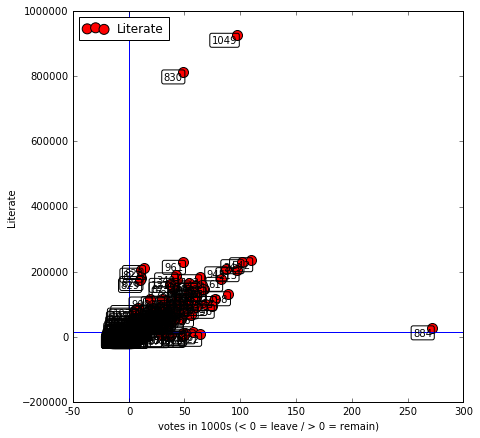

In [311]:
# cannot reuse earlier showplot method, so tweak the code here
# had to add FuncFormatter as well because the x axis has much greater vote values, because we measure 
# regions (=bigger) instead of areas (=smaller) here
factor = "Literate"
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1,1,1) 
ax.scatter(votes_and_income["Not_Literate"], votes_and_income[factor], s=100, c='r', marker="o", label=factor)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: ('%2d')%(y*1e-3)))
# show region name for each dot
for i, txt in enumerate(votes_and_income.index):
    ax.annotate(txt, (votes_and_income["Not_Literate"][i], votes_and_income[factor][i]), 
               horizontalalignment='right', verticalalignment='top',
               bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.2'))
plt.legend(loc='upper left');
plt.xlabel("votes in 1000s (< 0 = leave / > 0 = remain)")
plt.ylabel(factor)
plt.axvline(x=0)

plt.axhline(y=votes_and_income[factor].mean()) # draw a horizontal line in the mean of the dataset
plt.show()
#fig.savefig(factor+".png")

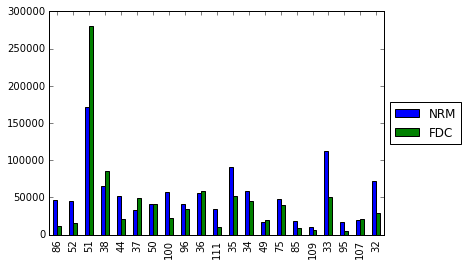

In [353]:
top5_leave12 = allg[["DISTRICT","NRM","FDC"]].sort_values(by="DISTRICT", ascending=False)[0:21]
top5_leave12.head(5)
plt1 = top5_leave12.plot(kind="bar")
plt1.legend(loc='center left', bbox_to_anchor=(1, 0.5))